In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [3]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

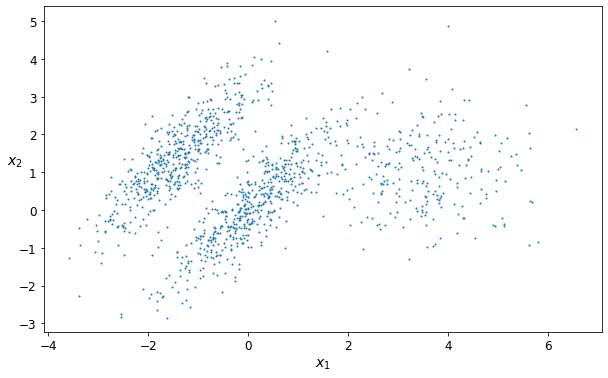

In [4]:
plt.figure(figsize=(10, 6))
plot_clusters(X)

### Mixture of Gaussians


K-평균

c:\Users\outof\Anaconda3\envs\py10\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
c:\Users\outof\Anaconda3\envs\py10\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


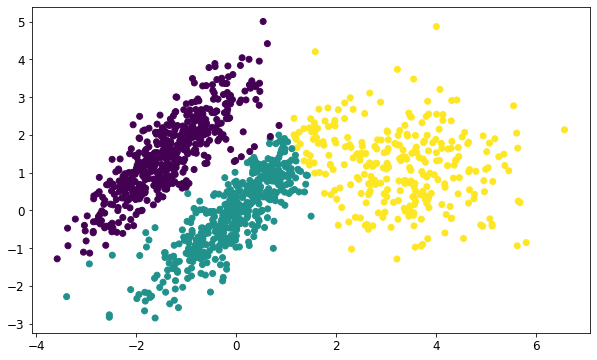

In [5]:
from sklearn.cluster import KMeans
 
init_centers = np.array([[-1,2], [1.5,1], [5, 1]]) # 초기 중심값
kmeans = KMeans(n_clusters=3, init=init_centers, random_state=100)
kmeans.fit(X) # 클러스터링 수행
labels = kmeans.labels_ # 최종 클러스터 라벨
 
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

$$
p({\bf x}) = \sum_{k=1}^K \pi_k N({\bf x}|{\bf \mu}_k, \Sigma_k) \qquad{(9.7)}

$$

- $K$차원을 가지는 이진 랜덤 변수 (binary random variable) 잠재변수$z$를 도입
  - $K$개의 요소 중 1개의 값만 1이고 나머지는 0
  - 따라서 $z_k \in \{0,1\}$ 이고 $\sum_k z_k = 1$이다 


- 이제 $z_k$ 의 주변 분포를 혼합계수(mixing coefficients) $\pi_k$를 사용하여 정의할 수 있다

$$
p(z_k=1) = \pi_k

$$

- $\pi_k$는 다음과 같은 성질을 만족한다

$$
0 \le \pi_k \le 1 \qquad{(9.8)} \\
\sum_{k=1}^K \pi_k = 1 \qquad{(9.9)} \\
p({\bf z})=\prod_{k=1}^K \pi_k^{z_k} \qquad{(9.10)}

$$

- $x$를 $z_k$에 대한 조건부 분포로 나타내면 다음과 같다

$$
p({\bf x}|z_k=1) = \mathcal  {N}({\bf x}|{\bf \mu_k}, \Sigma_k) \\
p({\bf x}|\mathbf{z}) = \prod_{k=1}^{K}\mathcal  {N}({\bf x}|{\bf \mu_k}, \Sigma_k)^{z_k}
$$

- $x$에 대한 주변분포는 다음과 같다

$$
p({\bf x}) = \sum_z p({\bf z})p({\bf x}|{\bf z}) = \sum_{k=1}^{K} \pi_k \mathcal{N}({\bf x}|{\bf \mu}_k, \Sigma_k) \qquad{(9.12)}
$$

- 이전에 쓰던 혼합 정규분포와 다른게 없다. 하지만 명시적으로 잠재변수(z)를 도입하여 결합 확률분포 $p(\mathbf{x},\mathbf{z})$를 사용한다는게 중요

- $\gamma(z_k)$은 데이터(x)가 주어졌을 때 $z_k$의 조건부 확률은 $z_k = 1$ 일 때의 사후확률 값이며 책임(responsibility) 이라 한다 

$$
\gamma(z_k) \equiv p(z_k=1|{\bf x}) = \frac{p(z_k=1)p({\bf x}|z_k=1)}{\sum_j^K p(z_j=1)p({\bf x}|z_j=1)}=\frac{\pi_k N({\bf x}|{\bf \mu}_k, \Sigma_k)}{\sum_{j=1}^K \pi_j N({\bf x}|{\bf \mu}_j, \Sigma_j)} \qquad{(9.13)}
$$

### 최대 가능도(MLE)

$$
\ln p({\bf X}|{\bf \pi}, {\bf \mu}, \Sigma) = \sum_{n=1}^N \ln \left\{\sum_{k=1}^K \pi_k N({\bf x}_n|{\bf \mu}_k, \Sigma_k)\right\} \qquad{(9.14)}
$$

- 특이점, 식별의 문제 등으로 가우시안 혼합모델에서는 MLE만으로 충분하지 않다.

### 가우시안 혼합 분포에 대한 EM 


- 우선 다변량 정규분포의 pdf는 다음과 같다

$$
\begin{align}
\mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
\end{align}
$$

- 9.14 로그 가능도 함수를 각각 $u_k$ 와 $\Sigma_k$ 에 대하여 미분해서 0이되는 값을 찾아보자 

$$
0=-\sum_{n=1}^N \frac{\pi_k \mathcal {N} ({\bf x}_n|{\bf \mu}_k, \Sigma_k)}{\sum_j \pi_j \mathcal{N}({\bf x}_n|{\bf \mu}_j, \Sigma_j)}\Sigma_K^{-1}({\bf x}_n-{\bf \mu}_k) \qquad{(9.16)}
$$

$$
{\bf \mu}_k = \frac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk}){\bf x}_n \qquad{(9.17)}
$$

$$
N_k = \sum_{n=1}^N \gamma(z_{nk}) \qquad{(9.18)}

$$

$$
\Sigma_k = \frac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk})({\bf x}_n-{\bf \mu}_k)({\bf x}_n-{\bf \mu}_k)^T \qquad{(9.19)}
$$

- 로그가능도함수를 $\pi_k$ 에 대하여 미분해야 되는데 제약조건이 있으므로 라그랑지안 승수방식으로 처리한다

$$
\ln p({\bf X}|{\bf \pi}, {\bf \mu}, \Sigma)+\lambda\left(\sum_{k=1}^K \pi_k-1\right) \qquad{(9.20)} \\
0 = \sum_{n=1}^{N} \frac{N({\bf x}_n|{\bf \mu}_k, \Sigma_k)}{\sum_j \pi_j N({\bf x}_n|{\bf \mu}_j, \Sigma_j)}+\lambda \qquad{(9.21)}
$$

- 양변에 $\pi_k$ 를 곱하고 9.13 식을 이용하면 $\lambda = -N$이라는 것을 알 수 있으므로 k번째 혼합계수는 책임값들의 평균이 됨을 알 수 있다. 

$$
\pi_k = \frac{N_k}{N} \qquad{(9.22)}
$$

- 위의 계산결과로 $k$번째 혼합계수는 책임(responsibility )의 평균이다

### 가우시안 혼합 모델의 EM 적용정리

- 초기화 단계
  - 평균 $\mu_k$ 공분산 $\Sigma_k$ 혼합계수 $\pi_k$ 를 적당한 값으로 초기화 한다.
- E 단계
  - 책임(responsibility)을 이전 파라메터값으로 계산한다.
- M 단계
  - E단계에서 계산은 책임(responsibility)을 이용하여 파라메터값을 계산한다.

$$
{\bf \mu}_k^{new} = \frac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk}){\bf x}_n \qquad{(9.24)}
$$

$$
\Sigma_k^{new} = \frac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk})({\bf x}_n-{\bf \mu}_k)({\bf x}_n-{\bf \mu}_k)^T \qquad{(9.25)}
$$

$$
\pi_k^{new} = \frac{N_k}{N} \qquad{(9.26)}
$$

$$
N_k = \sum_{n=1}^N \gamma(z_{nk}) \qquad{(9.27)}

$$

- 가능도 함수 평가
  - 수렴했는지 확인하며 수렴하지 않으면 E단계로 돌아가 반복한다

$$
\ln p({\bf X}|{\bf \mu}, \Sigma, {\bf \pi}) = \sum_{n=1}^N \left\{ \ln\sum_{k=1}^K \pi_k N({\bf x}_n|{\bf \mu}_k, \Sigma_k)\right\} \qquad{(9.28)}
$$

In [43]:
def gaussian_mixture_clustering(X, n_components, init_mu=None, init_cov_mat=None, init_weights=None,
                                epsilon=1e-4, max_iter=20, random_state=100):
    from scipy.stats import multivariate_normal
    import random
    # set initial value
    
    if init_mu is None:
        random.seed(random_state)
        # X에서 임의로 평균 선택 
        idx = random.sample(range(X.shape[0]), n_components)
        mu = X[idx,:]
    else:
        mu = init_mu
 
    if init_cov_mat is None:
        np.random.seed(random_state)
        cov_list = []
        for _ in range(n_components):
            # n by n 대칭행렬 만들기
            arr = np.random.rand(X.shape[1]**2)+0.1
            temp_mat = np.triu(arr.reshape(X.shape[1], X.shape[1]))
            cov_elem = temp_mat.dot(temp_mat.T)
            cov_list.append(cov_elem)
 
        cov_mat = np.array(cov_list)
    else:
        cov_mat = init_cov_mat
 
    if init_weights is None:
        #가중치 균등 분할
        weights = np.array([1/n_components]*n_components)
    else:
        weights = init_weights
 
    objective_value = -np.infty
    objective_value_history = []
    iteration = 1
    
    while(iteration<max_iter):
        # E-step
        assign_prob = []
        # 모든 X 원소마다 각 gamma(pi_k)(책임)을 계산
        for i,d in enumerate(X):
            assign_prob_temp = []
            for k in range(n_components):
 
                assign_prob_temp.append(weights[k]*\
                                multivariate_normal(mean=mu[k],cov=cov_mat[k]).pdf(d))
 
            assign_prob_temp = np.array(assign_prob_temp)
            assign_prob_temp = assign_prob_temp/np.sum(assign_prob_temp)
            assign_prob.append(assign_prob_temp)
            
        # n by k array
        assign_prob = np.array(assign_prob)
 
        # M-step
        
        #N_k 계산
        temp_sum = np.sum(assign_prob, axis=0)
        
        next_weights = []
        next_mu = []
        next_cov_mat = []
        
        for k in range(n_components):
            # ( n , 1) 행렬로 만든 후 mu_k 계산
            mu_numerator = np.sum(np.expand_dims(assign_prob[:,k],axis=1)*X, axis=0)
            next_mu_vector = mu_numerator/temp_sum[k]
            next_mu.append(next_mu_vector)
            next_weights.append(temp_sum[k]/X.shape[0])

            # 공분산 행렬 계산
            t = []
            for i,d in enumerate(X):
                tt = d-next_mu_vector
                tt = np.expand_dims(tt,axis=1)
                tt_cov = np.matmul(tt,tt.transpose())
                tt_term = assign_prob[i][k]*tt_cov
                t.append(tt_term)
            t = np.array(t)
            
            cov_numerator = np.sum(t,axis=0)
            next_cov_mat.append(cov_numerator/temp_sum[k])
 
        next_objective_value = 0
        
        #log 가능도 평가
        for x in X:
            value = np.log(np.sum([next_weights[k]*multivariate_normal(mean=next_mu[k],cov=next_cov_mat[k]).pdf(x) 
                     for k in range(n_components)]))
            next_objective_value += value
        
        
        objective_value_history.append(next_objective_value)
        
        
        if abs(next_objective_value-objective_value) <= epsilon:
            
            labels = [np.argmax(x) for x in assign_prob]
            print("가능도 함수 수렴")
            return (labels, iteration, objective_value_history)
        
        else:
            weights = next_weights
            mu = next_mu
            cov_mat = next_cov_mat
            objective_value = next_objective_value
        iteration += 1
    
    
    labels = [np.argmax(x) for x in assign_prob]
    print("iteraion 횟수 초과")
    return (labels, iteration, objective_value_history)

In [82]:
#X = np.c_[x,y] 
init_mu = np.array([[-1,2], [1.5,1], [5, 1]])
labels, iter, histroty = gaussian_mixture_clustering(X, 3, init_mu=init_mu, init_cov_mat=None, init_weights=None,
                                epsilon=1e-4, max_iter=200, random_state=100)

가능도 함수 수렴


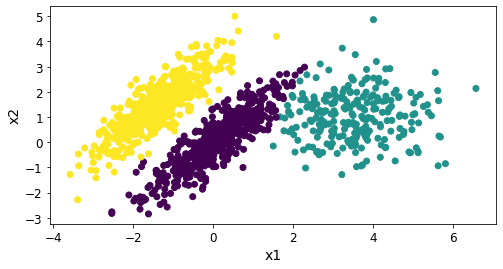

In [88]:
plt.figure(figsize=(8, 4))
fig.set_facecolor('white')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

c:\Users\outof\Anaconda3\envs\py10\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


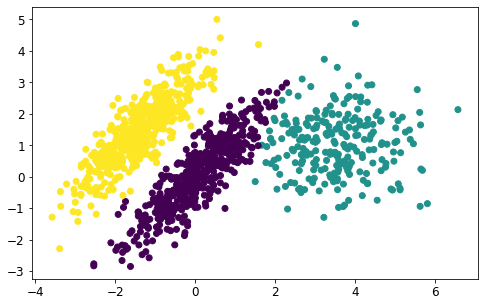

In [97]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3,random_state=100)
gmm.fit(X) # GMM 클러스터링 수행
labels = gmm.predict(X) # 최종 클러스터 라벨링
 
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

<img src="Figure9.14.png" width="30%" height="30%"/>

In [89]:
from sklearn.mixture import BayesianGaussianMixture

In [95]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    #plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

In [91]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

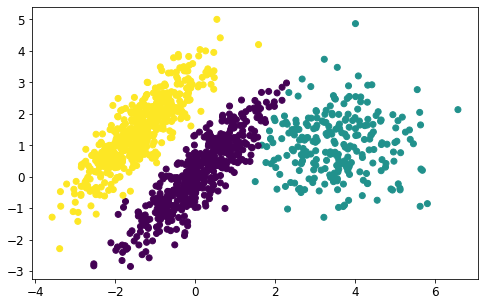

In [98]:
labels = bgm.predict(X) # 최종 클러스터 라벨링
 
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()